# Initializing Libraries

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.preprocessing import OneHotEncoder
import dask.dataframe as dd
import warnings

In [2]:
warnings.filterwarnings('ignore')

# Load & View Dataset

In [3]:
df = pd.read_csv(r'D:\excel sheets\CustomerLoyaltyProgram.csv')


In [4]:
df

,Loyalty,First Name,Last Name,Customer Name,Country,Province or State,City,Gender,Education,Location Code,...,Product Line,Coupon Response,Count,Quantity Sold,Unit Sale Price,Unit Cost,Revenue,Customer Lifetime Value,Loyalty Count,target
0,837810,Abigail,Goris,Abigail Goris,Canada,British Columbia,Dawson Creek,male,Bachelor,Rural,...,Computers and Home Office,Coupon 6,1,3,"1,182","1,005","3,546",8842.65,1,1
1,707928,Ada,Glaude,Ada Glaude,Germany,Bremen,Bremen,male,High School or Below,Rural,...,Computers and Home Office,Coupon 1,1,1,434,369,434,3508.57,1,1
2,901442,Ada,Staback,Ada Staback,Canada,Manitoba,Winnipeg,female,Bachelor,Rural,...,Computers and Home Office,Coupon 1,1,2,201,171,402,8044.87,1,1
3,237303,Adam,Boner,Adam Boner,Canada,Ontario,Sudbury,female,Bachelor,Urban,...,Computers and Home Office,Coupon 4,1,3,757,643,"2,271",8660.84,1,0
4,348835,Adam,Dunnegan,Adam Dunnegan,Canada,Manitoba,Winnipeg,male,Master,Urban,...,Computers and Home Office,Coupon 1,1,2,161,137,322,25464.82,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84431,558505,Zackary,Faulknen,Zackary Faulknen,United States,Arkansas,Little Rock,male,High School or Below,Suburban,...,Photography,Coupon 4,1,2,224,190,448,43290.50,1,0
84432,442206,Zada,Bleakney,Zada Bleakney,United Kingdom,Brighton and Hove,Franklin Street,male,Bachelor,Urban,...,Photography,Coupon 1,1,6,648,551,"3,888",6615.82,1,1
84433,100339,Zenia,Weidert,Zenia Weidert,United Kingdom,Reading,Ilkley Road,female,Bachelor,Urban,...,Photography,Coupon 4,1,1,129,110,129,4422.88,1,0
84434,220548,Zenobia,Marlette,Zenobia Marlette,United States,California,Los Angeles,male,College,Urban,...,Photography,Coupon 1,1,2,329,280,658,9416.47,1,0


In [5]:
df.shape

(84436, 26)

In [6]:
df.dtypes

Loyalty                      int64
First Name                  object
Last Name                   object
Customer Name               object
Country                     object
Province or State           object
City                        object
Gender                      object
Education                   object
Location Code               object
Income                       int64
Marital Status              object
Order Year                   int64
Quarter                     object
MonthsAsMember               int64
LoyaltyStatus               object
Product Line                object
Coupon Response             object
Count                        int64
Quantity Sold                int64
Unit Sale Price             object
Unit Cost                   object
Revenue                     object
Customer Lifetime Value    float64
Loyalty Count                int64
target                      object
dtype: object

In [7]:
df.describe()

,Loyalty,Income,Order Year,MonthsAsMember,Count,Quantity Sold,Customer Lifetime Value,Loyalty Count
count,84436.000000,84436.000000,84436.000000,84436.000000,84436.0,84436.000000,84436.000000,84436.0
mean,549512.804361,37696.756739,2017.780769,50.842413,1.0,4.691127,8006.668891,1.0
std,259630.439248,30380.972848,1.174525,11.222656,0.0,6.320082,6894.943733,0.0
min,100018.000000,0.000000,2016.000000,25.000000,1.0,1.000000,1898.010000,1.0
25%,325700.750000,0.000000,2017.000000,43.000000,1.0,1.000000,3978.670000,1.0
50%,546811.500000,34062.000000,2018.000000,52.000000,1.0,3.000000,5781.020000,1.0
75%,773859.000000,62366.000000,2019.000000,60.000000,1.0,7.000000,8954.840000,1.0
max,999986.000000,99981.000000,2020.000000,70.000000,1.0,144.000000,83325.380000,1.0


In [8]:
df.head()

,Loyalty,First Name,Last Name,Customer Name,Country,Province or State,City,Gender,Education,Location Code,...,Product Line,Coupon Response,Count,Quantity Sold,Unit Sale Price,Unit Cost,Revenue,Customer Lifetime Value,Loyalty Count,target
0,837810,Abigail,Goris,Abigail Goris,Canada,British Columbia,Dawson Creek,male,Bachelor,Rural,...,Computers and Home Office,Coupon 6,1,3,"1,182","1,005","3,546",8842.65,1,1
1,707928,Ada,Glaude,Ada Glaude,Germany,Bremen,Bremen,male,High School or Below,Rural,...,Computers and Home Office,Coupon 1,1,1,434,369,434,3508.57,1,1
2,901442,Ada,Staback,Ada Staback,Canada,Manitoba,Winnipeg,female,Bachelor,Rural,...,Computers and Home Office,Coupon 1,1,2,201,171,402,8044.87,1,1
3,237303,Adam,Boner,Adam Boner,Canada,Ontario,Sudbury,female,Bachelor,Urban,...,Computers and Home Office,Coupon 4,1,3,757,643,"2,271",8660.84,1,0
4,348835,Adam,Dunnegan,Adam Dunnegan,Canada,Manitoba,Winnipeg,male,Master,Urban,...,Computers and Home Office,Coupon 1,1,2,161,137,322,25464.82,1,0


In [9]:
df.tail()

,Loyalty,First Name,Last Name,Customer Name,Country,Province or State,City,Gender,Education,Location Code,...,Product Line,Coupon Response,Count,Quantity Sold,Unit Sale Price,Unit Cost,Revenue,Customer Lifetime Value,Loyalty Count,target
84431,558505,Zackary,Faulknen,Zackary Faulknen,United States,Arkansas,Little Rock,male,High School or Below,Suburban,...,Photography,Coupon 4,1,2,224,190,448,43290.50,1,0
84432,442206,Zada,Bleakney,Zada Bleakney,United Kingdom,Brighton and Hove,Franklin Street,male,Bachelor,Urban,...,Photography,Coupon 1,1,6,648,551,"3,888",6615.82,1,1
84433,100339,Zenia,Weidert,Zenia Weidert,United Kingdom,Reading,Ilkley Road,female,Bachelor,Urban,...,Photography,Coupon 4,1,1,129,110,129,4422.88,1,0
84434,220548,Zenobia,Marlette,Zenobia Marlette,United States,California,Los Angeles,male,College,Urban,...,Photography,Coupon 1,1,2,329,280,658,9416.47,1,0
84435,949511,Zina,Kocsis,Zina Kocsis,United States,Colorado,Colorado Springs,male,College,Rural,...,Photography,Coupon 4,1,1,143,122,143,3709.92,1,1


In [10]:
df.info("")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84436 entries, 0 to 84435
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loyalty                  84436 non-null  int64  
 1   First Name               84436 non-null  object 
 2   Last Name                84436 non-null  object 
 3   Customer Name            84436 non-null  object 
 4   Country                  84436 non-null  object 
 5   Province or State        84436 non-null  object 
 6   City                     84436 non-null  object 
 7   Gender                   84436 non-null  object 
 8   Education                84436 non-null  object 
 9   Location Code            84436 non-null  object 
 10  Income                   84436 non-null  int64  
 11  Marital Status           84436 non-null  object 
 12  Order Year               84436 non-null  int64  
 13  Quarter                  84436 non-null  object 
 14  MonthsAsMember        

In [11]:
print(df.dtypes.value_counts())

object     18
int64       7
float64     1
Name: count, dtype: int64


In [12]:
df.isnull().sum()

Loyalty                    0
First Name                 0
Last Name                  0
Customer Name              0
Country                    0
Province or State          0
City                       0
Gender                     0
Education                  0
Location Code              0
Income                     0
Marital Status             0
Order Year                 0
Quarter                    0
MonthsAsMember             0
LoyaltyStatus              0
Product Line               0
Coupon Response            0
Count                      0
Quantity Sold              0
Unit Sale Price            0
Unit Cost                  0
Revenue                    0
Customer Lifetime Value    0
Loyalty Count              0
target                     0
dtype: int64

In [13]:
df.fillna(0, inplace=True)

In [14]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [15]:
print(df.isnull().sum())

Loyalty                    0
First Name                 0
Last Name                  0
Customer Name              0
Country                    0
Province or State          0
City                       0
Gender                     0
Education                  0
Location Code              0
Income                     0
Marital Status             0
Order Year                 0
Quarter                    0
MonthsAsMember             0
LoyaltyStatus              0
Product Line               0
Coupon Response            0
Count                      0
Quantity Sold              0
Unit Sale Price            0
Unit Cost                  0
Revenue                    0
Customer Lifetime Value    0
Loyalty Count              0
target                     0
dtype: int64


In [16]:
df_numeric = df.apply(pd.to_numeric, errors='coerce')

In [17]:
df_numeric

,Loyalty,First Name,Last Name,Customer Name,Country,Province or State,City,Gender,Education,Location Code,...,Product Line,Coupon Response,Count,Quantity Sold,Unit Sale Price,Unit Cost,Revenue,Customer Lifetime Value,Loyalty Count,target
0,837810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,3,NaN,NaN,NaN,8842.65,1,1.0
1,707928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1,434.0,369.0,434.0,3508.57,1,1.0
2,901442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,2,201.0,171.0,402.0,8044.87,1,1.0
3,237303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,3,757.0,643.0,NaN,8660.84,1,0.0
4,348835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,2,161.0,137.0,322.0,25464.82,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84431,558505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,2,224.0,190.0,448.0,43290.50,1,0.0
84432,442206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,6,648.0,551.0,NaN,6615.82,1,1.0
84433,100339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1,129.0,110.0,129.0,4422.88,1,0.0
84434,220548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,2,329.0,280.0,658.0,9416.47,1,0.0


# Data Cleaning

In [18]:
# Remove duplicate records
df.drop_duplicates(inplace=True)
print("Number of records after removing duplicates:", df.shape[0])

Number of records after removing duplicates: 84436


In [19]:
# Remove columns with a single unique value
nunique_cols = df.nunique()
cols_to_drop = nunique_cols[nunique_cols == 1].index
df.drop(cols_to_drop, axis=1, inplace=True)
print("Number of columns after removing single unique value columns:", df.shape[1])

Number of columns after removing single unique value columns: 24


In [20]:
# Remove zero variance variables (considering only numerical columns)
numerical_cols = df.select_dtypes(include=[np.number]).columns
zero_var_cols = df[numerical_cols].var()[df[numerical_cols].var() == 0].index
df.drop(zero_var_cols, axis=1, inplace=True)
print("Number of columns after removing zero variance variables:", df.shape[1])

Number of columns after removing zero variance variables: 24


In [21]:
# Handling missing values
print("Missing values in the dataset:")
print(df.isnull().sum())

Missing values in the dataset:
Loyalty                    0
First Name                 0
Last Name                  0
Customer Name              0
Country                    0
Province or State          0
City                       0
Gender                     0
Education                  0
Location Code              0
Income                     0
Marital Status             0
Order Year                 0
Quarter                    0
MonthsAsMember             0
LoyaltyStatus              0
Product Line               0
Coupon Response            0
Quantity Sold              0
Unit Sale Price            0
Unit Cost                  0
Revenue                    0
Customer Lifetime Value    0
target                     0
dtype: int64


In [22]:
# Fill missing values with the mean for numerical columns and the mode for categorical columns
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].mean(), inplace=True)

In [23]:
# Verify that there are no missing values
print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
Loyalty                    0
First Name                 0
Last Name                  0
Customer Name              0
Country                    0
Province or State          0
City                       0
Gender                     0
Education                  0
Location Code              0
Income                     0
Marital Status             0
Order Year                 0
Quarter                    0
MonthsAsMember             0
LoyaltyStatus              0
Product Line               0
Coupon Response            0
Quantity Sold              0
Unit Sale Price            0
Unit Cost                  0
Revenue                    0
Customer Lifetime Value    0
target                     0
dtype: int64


In [24]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [25]:
label_encoder = LabelEncoder()

In [26]:
# Ensure all categorical values are strings
for col in categorical_cols:
    df[col] = df[col].astype(str)
    df[col] = label_encoder.fit_transform(df[col])


# Display the first few rows of the dataframe
print(df.shape)
df.dtypes

(84436, 24)


Loyalty                      int64
First Name                   int32
Last Name                    int32
Customer Name                int32
Country                      int32
Province or State            int32
City                         int32
Gender                       int32
Education                    int32
Location Code                int32
Income                       int64
Marital Status               int32
Order Year                   int64
Quarter                      int32
MonthsAsMember               int64
LoyaltyStatus                int32
Product Line                 int32
Coupon Response              int32
Quantity Sold                int64
Unit Sale Price              int32
Unit Cost                    int32
Revenue                      int32
Customer Lifetime Value    float64
target                       int32
dtype: object

# Removing Outliers

In [27]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
# Calculate the Interquartile Range (IQR) using Q3 and Q1
IQR = Q3 - Q1
IQR
# Identify outliers using the IQR method
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
outliers
# Exclude rows with any outliers from the original DataFrame
df_no_outliers_1 = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df1 = df_no_outliers_1


In [28]:
df1

,Loyalty,First Name,Last Name,Customer Name,Country,Province or State,City,Gender,Education,Location Code,...,MonthsAsMember,LoyaltyStatus,Product Line,Coupon Response,Quantity Sold,Unit Sale Price,Unit Cost,Revenue,Customer Lifetime Value,target
0,837810,7,15894,86,0,12,19,1,0,0,...,33,0,0,5,3,182,5,4311,8842.65,1
2,901442,10,39345,126,0,26,110,0,0,0,...,47,0,0,0,2,601,346,5448,8044.87,1
3,237303,14,4218,160,0,34,93,0,0,2,...,55,0,0,3,3,1204,858,2869,8660.84,0
6,605640,24,26171,309,2,38,39,0,0,1,...,50,1,0,3,5,1126,792,4230,10660.90,0
7,723924,30,33036,370,1,40,82,0,1,1,...,65,0,0,2,5,256,68,6454,14585.38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84430,339519,5130,4066,65177,3,14,51,1,0,2,...,37,4,2,0,1,803,517,4801,2580.85,0
84432,442206,5137,3802,65249,2,10,31,1,0,2,...,64,1,2,0,6,1084,757,4546,6615.82,1
84433,100339,5147,44452,65365,2,38,39,0,0,2,...,61,1,2,3,1,529,285,1769,4422.88,0
84434,220548,5148,26153,65374,3,14,51,1,1,2,...,35,1,2,0,2,733,459,6925,9416.47,0


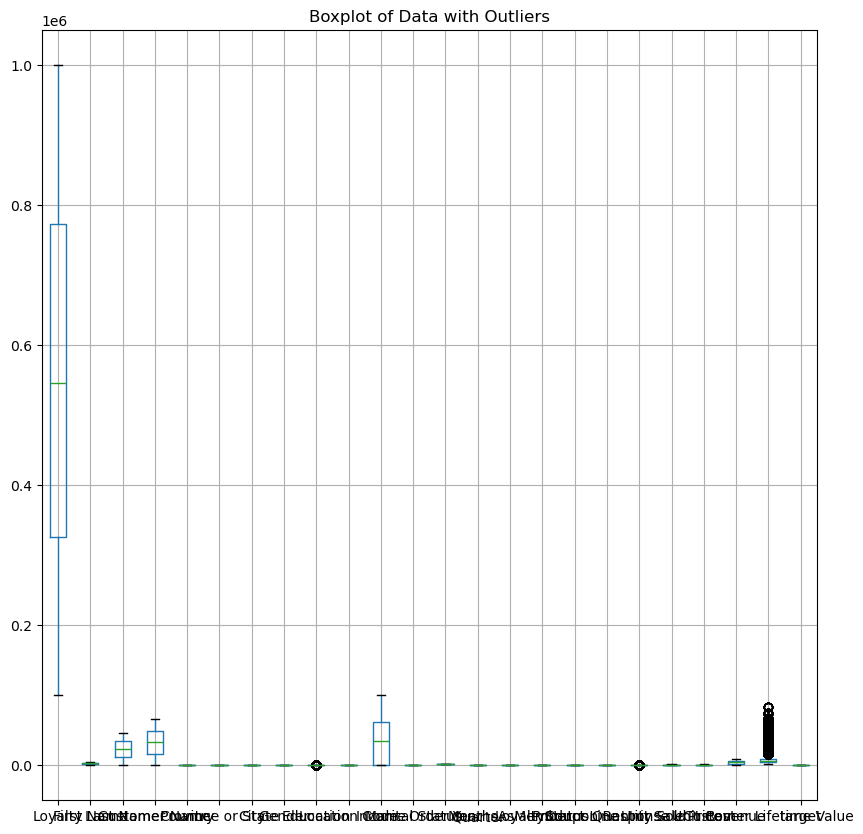

In [29]:
plt.figure(figsize=(10, 10))
df.boxplot()
plt.title("Boxplot of Data with Outliers")
plt.show()

In [30]:
def remove_outliers(df):
    mean = df.mean()
    std = df.std()
    lower_bounds = mean - 3 * std
    upper_bounds = mean + 3 * std
    # Iterate through each column in the DataFrame and filter out rows that fall within the bounds
    for col in df.columns:
        df = df[(df[col] > lower_bounds[col]) & (df[col] < upper_bounds[col])]
    # Print summary statistics for mean, standard deviation, lower bounds, and upper bounds    
    print("Means:",mean)
    print("\nSTD:",std)
    print("\nLower Bounds:",lower_bounds)
    print("\nUpper Bounds:",upper_bounds)
    # Return the DataFrame with outliers removed
    return df

In [31]:
remove_outliers(df)

Means: Loyalty                    549512.804361
First Name                   2577.232259
Last Name                   23273.425340
Customer Name               32769.516865
Country                         1.509913
Province or State              21.798617
City                           54.053307
Gender                          0.500628
Education                       0.606933
Location Code                   0.995452
Income                      37696.756739
Marital Status                  1.119558
Order Year                   2017.780769
Quarter                         1.260079
MonthsAsMember                 50.842413
LoyaltyStatus                   2.481915
Product Line                    2.344083
Coupon Response                 1.178289
Quantity Sold                   4.691127
Unit Sale Price               808.021377
Unit Cost                     660.446859
Revenue                      4144.845646
Customer Lifetime Value      8006.668891
target                          0.316192
dtype: fl

,Loyalty,First Name,Last Name,Customer Name,Country,Province or State,City,Gender,Education,Location Code,...,MonthsAsMember,LoyaltyStatus,Product Line,Coupon Response,Quantity Sold,Unit Sale Price,Unit Cost,Revenue,Customer Lifetime Value,target
0,837810,7,15894,86,0,12,19,1,0,0,...,33,0,0,5,3,182,5,4311,8842.65,1
1,707928,10,15511,118,1,9,14,1,3,0,...,52,0,0,0,1,849,556,5496,3508.57,1
2,901442,10,39345,126,0,26,110,0,0,0,...,47,0,0,0,2,601,346,5448,8044.87,1
3,237303,14,4218,160,0,34,93,0,0,2,...,55,0,0,3,3,1204,858,2869,8660.84,0
5,186842,19,11198,238,1,46,28,1,0,2,...,34,0,0,0,2,1360,991,780,23444.90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84430,339519,5130,4066,65177,3,14,51,1,0,2,...,37,4,2,0,1,803,517,4801,2580.85,0
84432,442206,5137,3802,65249,2,10,31,1,0,2,...,64,1,2,0,6,1084,757,4546,6615.82,1
84433,100339,5147,44452,65365,2,38,39,0,0,2,...,61,1,2,3,1,529,285,1769,4422.88,0
84434,220548,5148,26153,65374,3,14,51,1,1,2,...,35,1,2,0,2,733,459,6925,9416.47,0


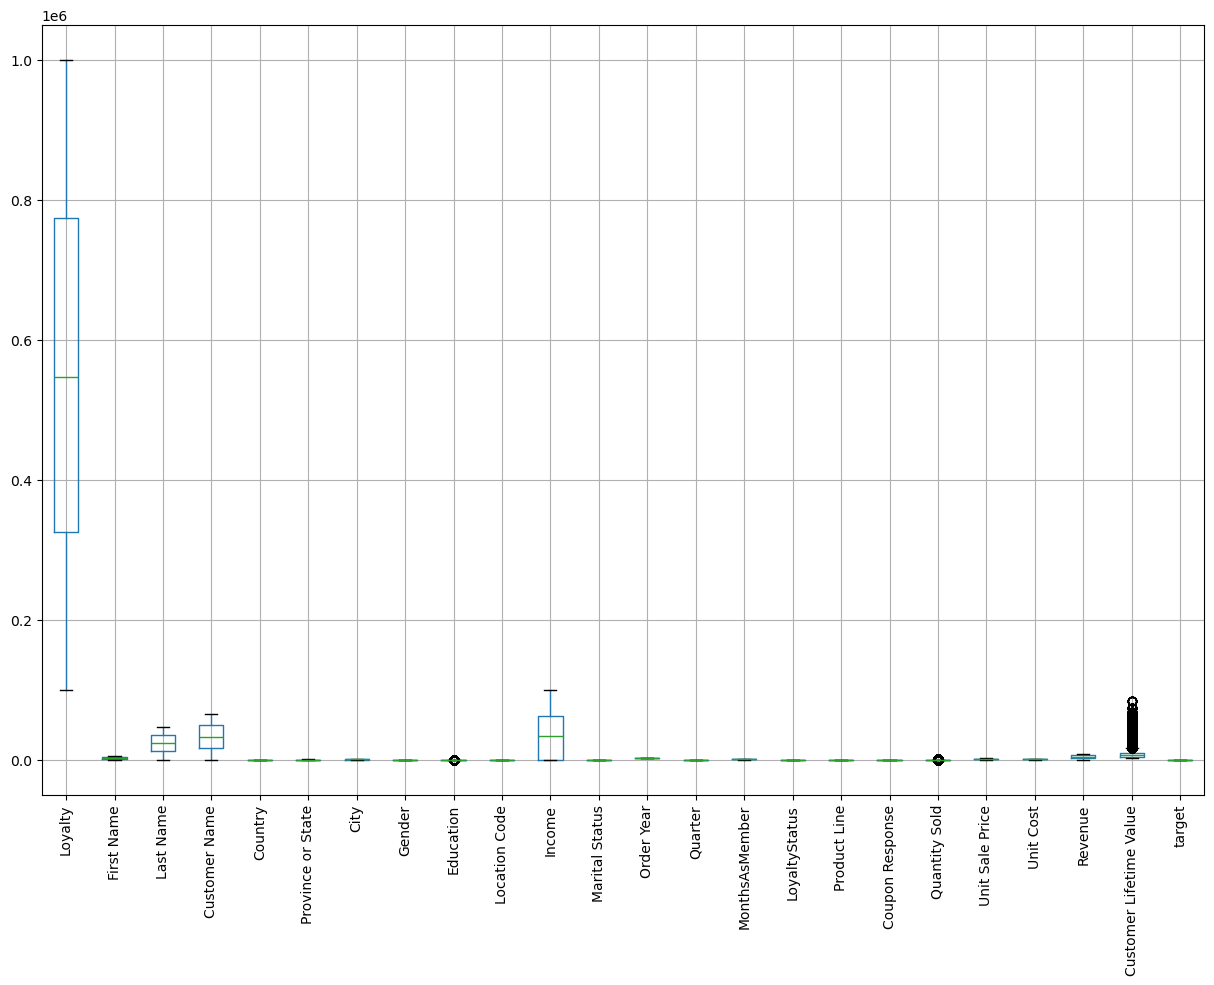

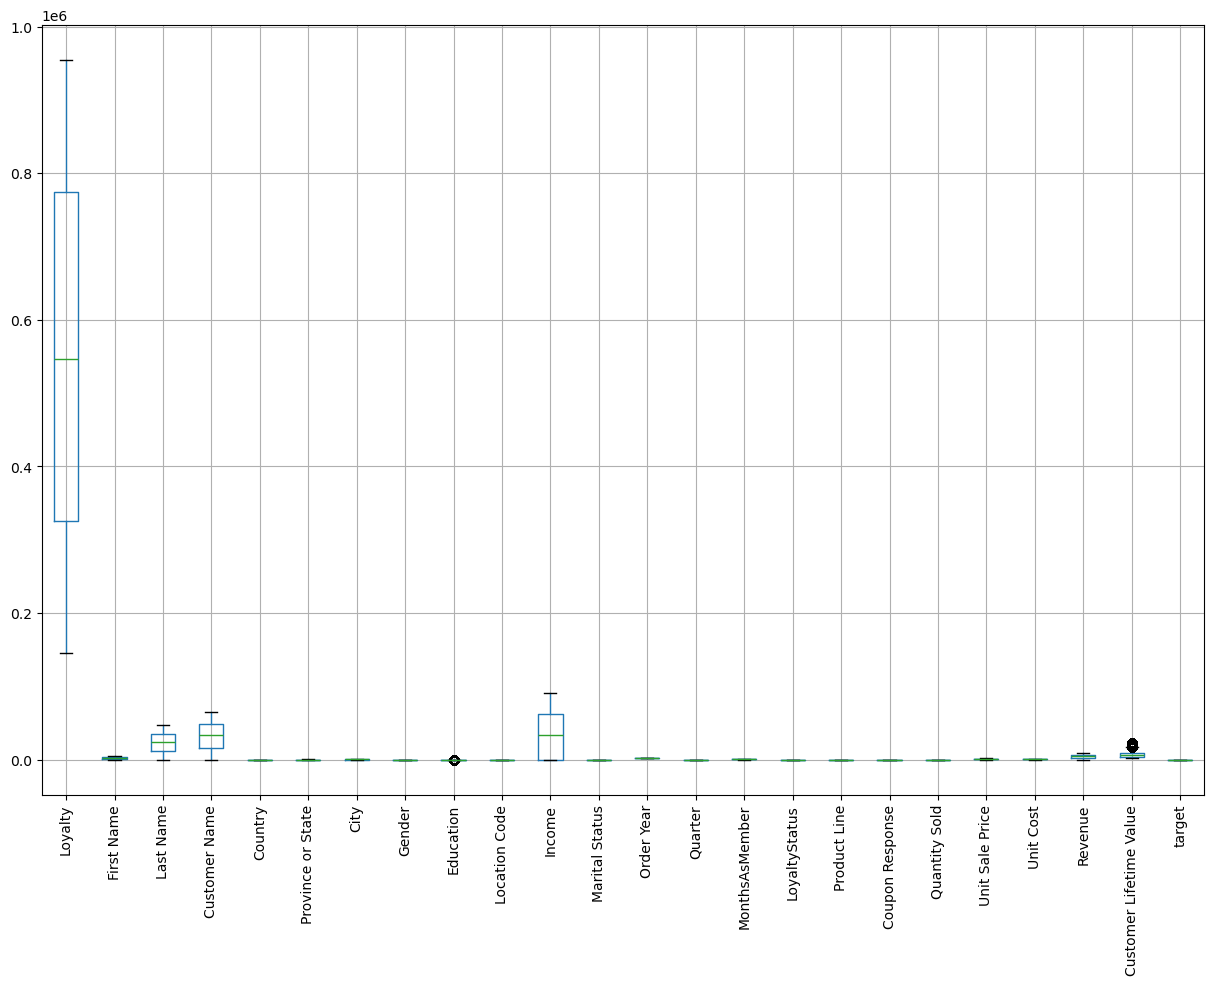

In [32]:
# Using boxplot to visualize outliers
plt.figure(figsize=(15, 10))
df.boxplot()
plt.xticks(rotation=90)
plt.show()

# Capping and flooring the outliers
def cap_floor(series):
    lower_bound = series.quantile(0.05)
    upper_bound = series.quantile(0.95)
    return series.clip(lower_bound, upper_bound)

for column in numerical_cols:
    df[column] = cap_floor(df[column])

# Visualize the data after outlier treatment
plt.figure(figsize=(15, 10))
df.boxplot()
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Data after Capping and Flooring')

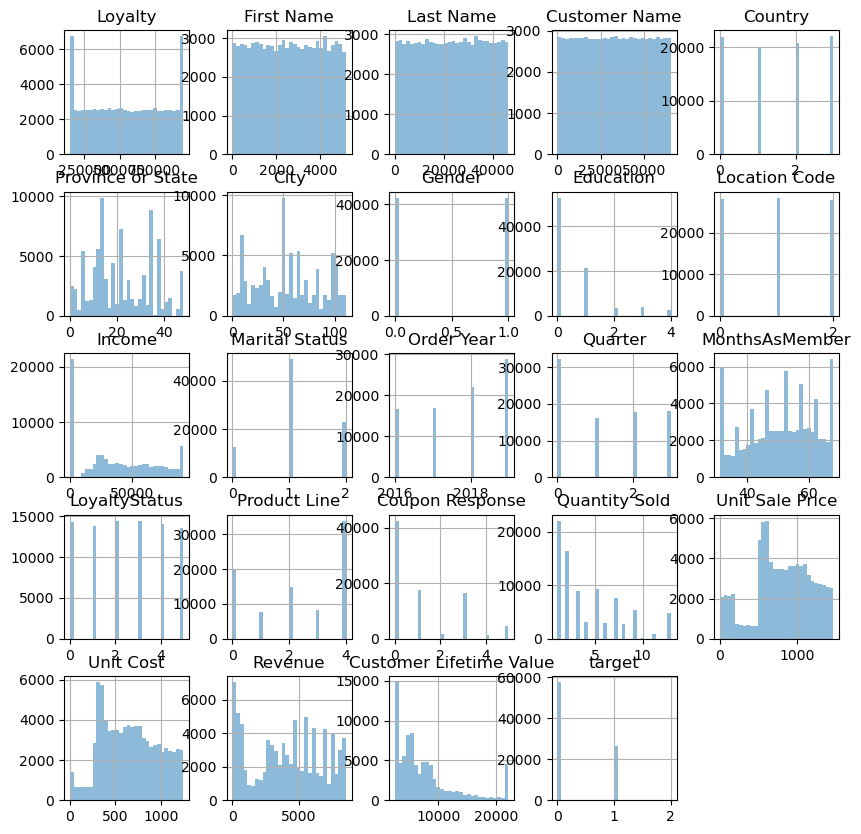

In [33]:
# Plot histograms
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

df.hist(bins=30, alpha=0.5, ax=axes[0])
axes[0].set_title("Original Data")

df[column].hist(bins=30, alpha=0.5, ax=axes[1])
axes[1].set_title("Data after Capping and Flooring")

# Removing Highly Correlated Variables

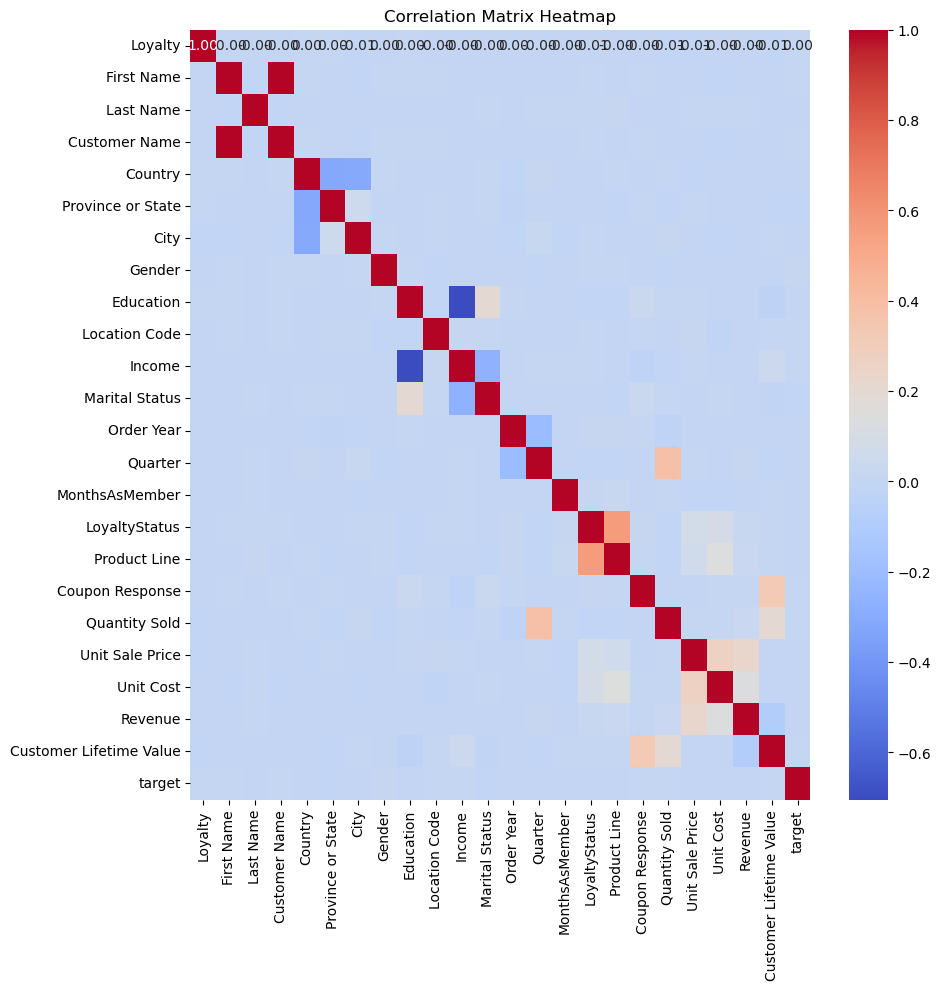

In [34]:
# Calculate the correlation matrix
correlation_matrix = df1.corr()
iters = range(len(correlation_matrix.columns) - 1)
drop_cols = []
# Generate a heatmap to visualize correlations
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


In [35]:
def remove_collinear_features(df1, threshold = 0.9):
    
    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = correlation_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                #print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    df1 = df1.drop(columns=drops)
    print('Removed Columns {}'.format(drops))
    return df1

In [36]:
df1 = remove_collinear_features(df1, threshold = 0.9)
print("Updated DataFrame Shape:", df1.shape)

Removed Columns {'Customer Name'}
Updated DataFrame Shape: (68127, 23)


In [37]:
#output_file = 'Customer_Loyalty.xlsx'
#df1.to_excel(output_file, index=False)

#print(f"Preprocessed data saved to {output_file}")

Preprocessed data saved to Customer_Loyalty.xlsx


# Removing Multicollinearity(VIF)

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
def calculate_vif(df1):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df1.columns
    vif_data["VIF"] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    return vif_data
print(calculate_vif(df1))

                    Feature        VIF
0                   Loyalty   5.480801
1                First Name   3.992361
2                 Last Name   4.009648
3                   Country   3.393410
4         Province or State   4.447381
5                      City   4.440307
6                    Gender   2.003225
7                 Education   2.821798
8             Location Code   2.498288
9                    Income   5.286294
10           Marital Status   4.593721
11               Order Year  74.337919
12                  Quarter   2.487896
13           MonthsAsMember  21.497939
14            LoyaltyStatus   4.657013
15             Product Line   4.682330
16          Coupon Response   1.768391
17            Quantity Sold   3.202823
18          Unit Sale Price   6.363769
19                Unit Cost   6.184408
20                  Revenue   3.807702
21  Customer Lifetime Value   5.634286
22                   target   1.465400


In [40]:
def remove_high_vif(df1, threshold=5.0):
    while True:
        vif_data = calculate_vif(df1)
        max_vif = vif_data["VIF"].max()
        if max_vif > threshold:
            feature_to_remove = vif_data.loc[vif_data["VIF"].idxmax(), "Feature"]
            print(f"Removing {feature_to_remove} with VIF: {max_vif}")
            df1 = df1.drop(columns=[feature_to_remove])
        else:
            break
    return df1

In [41]:
# Remove variables with VIF greater than 5
filtered_dataset = remove_high_vif(df1, threshold=5.0)

Removing Order Year with VIF: 74.33791893698265
Removing MonthsAsMember with VIF: 15.552619491569303
Removing Unit Sale Price with VIF: 6.158863248289777
Removing Unit Cost with VIF: 5.491895390410161
Removing Customer Lifetime Value with VIF: 5.262504591037684


In [42]:
print("\nDataFrame after removing variables with high VIF:", filtered_dataset.shape)


DataFrame after removing variables with high VIF: (68127, 18)


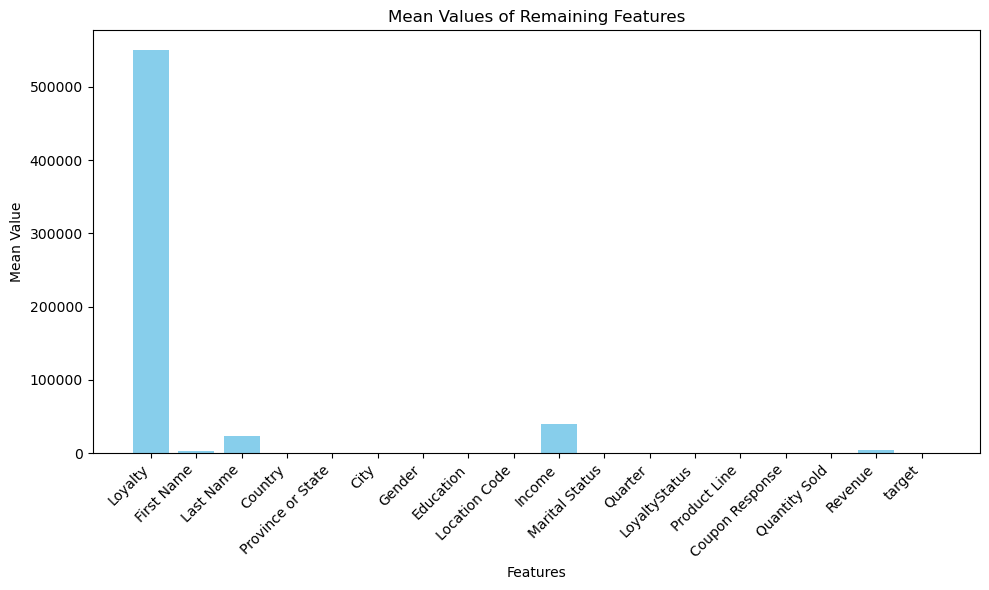

In [43]:
# Create a bar chart for the remaining columns
plt.figure(figsize=(10, 6))
plt.bar(filtered_dataset.columns, filtered_dataset.mean(), color='skyblue')
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.title('Mean Values of Remaining Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ML Model Building

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X = df1.drop('target', axis=1)
y = df1['target']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test

(       Loyalty  First Name  Last Name  Country  Province or State  City  \
 15926   162341        4956      13139        2                 47    10   
 22593   814029          16      28971        3                 19    59   
 37174   107649        3725      26651        0                  2    15   
 81869   408394        2420      30667        2                 38    58   
 35101   106779          56       3480        3                 19    70   
 ...        ...         ...        ...      ...                ...   ...   
 46249   612613        2461      25390        2                 21    50   
 7881    669198        1544       3352        3                 14    85   
 68098   173092        2710       1611        0                 34    93   
 1027    304906        4153      27806        3                 18   109   
 20194   358435         924      30092        1                 22    35   
 
        Gender  Education  Location Code  Income  ...  Quarter  MonthsAsMember  \
 159

In [47]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
X_train, X_temp, y_train, y_temp

(       Loyalty  First Name  Last Name  Country  Province or State  City  \
 33064   836295         295      37822        0                 12   103   
 18339   385026        1833      25460        3                 14    51   
 76872   342062        2160      45190        3                  0    10   
 61253   426384        4187      36600        0                 37    64   
 34236   741909        3846       8340        2                 47    10   
 ...        ...         ...        ...      ...                ...   ...   
 46249   612613        2461      25390        2                 21    50   
 7881    669198        1544       3352        3                 14    85   
 68098   173092        2710       1611        0                 34    93   
 1027    304906        4153      27806        3                 18   109   
 20194   358435         924      30092        1                 22    35   
 
        Gender  Education  Location Code  Income  ...  Quarter  MonthsAsMember  \
 330

In [48]:
X_val, X_test, y_val, y_test

(       Loyalty  First Name  Last Name  Country  Province or State  City  \
 49460   862464        2932      29144        2                 21    50   
 11977   180484         609      40678        0                 43    79   
 65720   504165        1398       8561        3                 14     1   
 56609   989696        4245      34435        1                 30    36   
 73754   609314         696      18118        2                 47    10   
 ...        ...         ...        ...      ...                ...   ...   
 2988    774557        2988      33945        1                 31    25   
 23743   938071         993      38063        1                 27    88   
 28401   468220        2147      32686        0                 34    98   
 48803   596047        3615      21957        1                  9    14   
 37225   984798        4243      14382        0                 37    64   
 
        Gender  Education  Location Code  Income  ...  Quarter  MonthsAsMember  \
 494

# Logistic Regression

# Initial Modeling

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Assuming X, y, X_train, y_train, X_test, y_test are already defined
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

y_pred = lr_clf.predict(X_test)

scores = cross_val_score(lr_clf, X, y, cv=5)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

def print_score(scores):
    print(f"Cross-validation scores: {scores}")
    print(f"Accuracy score: {accuracy}")
    print(f"Precision score: {precision}")
    print(f"Recall score: {recall}")
    print(f"F1 score: {f1}")
    print(f"Classification Report: {cr}")
    print(f"Confusion Matrix: {cm}")

print_score(scores)


Cross-validation scores: [0.68266549 0.6825921  0.6826422  0.6827156  0.6827156 ]
Accuracy score: 0.6867906066536204
Precision score: 0.47168133738764784
Recall score: 0.6867906066536204
F1 score: 0.5592648376473996
Classification Report:               precision    recall  f1-score   support

           0       0.69      1.00      0.81      7019
           1       0.00      0.00      0.00      3200
           2       0.00      0.00      0.00         1

    accuracy                           0.69     10220
   macro avg       0.23      0.33      0.27     10220
weighted avg       0.47      0.69      0.56     10220

Confusion Matrix: [[7019    0    0]
 [3200    0    0]
 [   1    0    0]]


# Hyperparameter Tuning

In [50]:
from sklearn.model_selection import GridSearchCV

lr_clf = LogisticRegression()

penalty = ['l1', 'l2']
C = [0.5, 0.6, 0.7, 0.8]
solver = ['liblinear', 'saga']

param_grid = dict(
    penalty=penalty, 
    C=C, 
    solver=solver
)

lr_cv = GridSearchCV(
    estimator=lr_clf, 
    param_grid=param_grid, 
    scoring='f1',
    verbose=1, 
    n_jobs=-1, 
    cv=10
)

lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")

lr_clf = LogisticRegression(**best_params)
lr_clf.fit(X_train, y_train)

# Evaluating with the best parameters
y_pred = lr_clf.predict(X_test)
scores = cross_val_score(lr_clf, X, y, cv=5)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print_score(scores)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
Best parameters: {'C': 0.5, 'penalty': 'l1', 'solver': 'liblinear'}
Cross-validation scores: [0.68266549 0.6825921  0.6826422  0.6827156  0.6827156 ]
Accuracy score: 0.6867906066536204
Precision score: 0.47168133738764784
Recall score: 0.6867906066536204
F1 score: 0.5592648376473996
Classification Report:               precision    recall  f1-score   support

           0       0.69      1.00      0.81      7019
           1       0.00      0.00      0.00      3200
           2       0.00      0.00      0.00         1

    accuracy                           0.69     10220
   macro avg       0.23      0.33      0.27     10220
weighted avg       0.47      0.69      0.56     10220

Confusion Matrix: [[7019    0    0]
 [3200    0    0]
 [   1    0    0]]


# Confusion Matrix

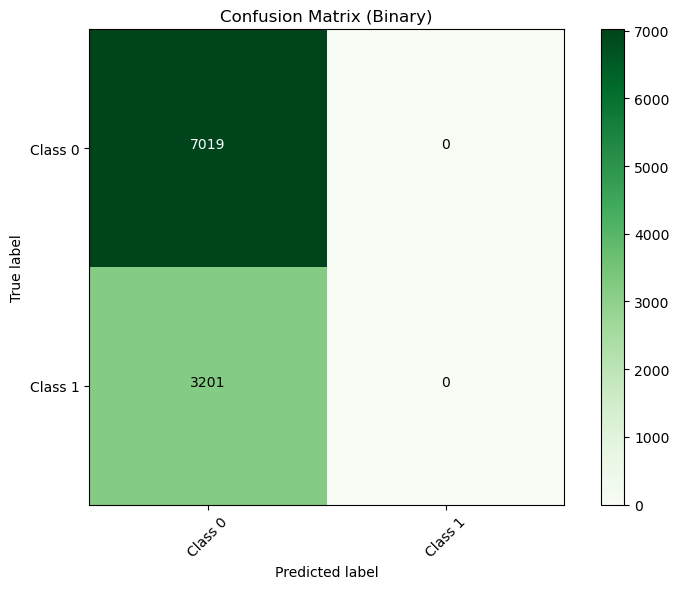

In [51]:

# Assuming y_test and y_pred are already defined

# Combine classes 1 and 2 into a single class, say 1
y_test_binary = np.where(y_test == 0, 0, 1)
y_pred_binary = np.where(y_pred == 0, 0, 1)

# Calculate the confusion matrix for the binary classification
cm_binary = confusion_matrix(y_test_binary, y_pred_binary)

# Visualize the binary confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm_binary, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('Confusion Matrix (Binary)')
plt.colorbar()
classes_binary = ['Class 0', 'Class 1']
tick_marks = np.arange(len(classes_binary))
plt.xticks(tick_marks, classes_binary, rotation=45)
plt.yticks(tick_marks, classes_binary)

fmt = 'd'
thresh = cm_binary.max() / 2.
for i, j in np.ndindex(cm_binary.shape):
    plt.text(j, i, format(cm_binary[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm_binary[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


# Random Forest

# Initial Modeling

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

scores = cross_val_score(rf_clf, X, y, cv=5)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

def print_score(scores):
    print(f"Cross-validation scores: {scores}")
    print(f"Accuracy scores: {accuracy}")
    print(f"Precision scores: {precision}")
    print(f"Recall scores: {recall}")
    print(f"F1 scores: {f1}")
    print(f"Classification Report: {cr}")
    print(f"Confusion Matrix: {cm}")

print_score(scores)

Cross-validation scores: [0.6664465  0.65419052 0.65166972 0.63405505 0.58047706]
Accuracy scores: 0.6515655577299413
Precision scores: 0.5684157673476348
Recall scores: 0.6515655577299413
F1 scores: 0.5809410859137109
Classification Report:               precision    recall  f1-score   support

           0       0.69      0.91      0.78      7019
           1       0.31      0.09      0.14      3200
           2       0.00      0.00      0.00         1

    accuracy                           0.65     10220
   macro avg       0.33      0.33      0.31     10220
weighted avg       0.57      0.65      0.58     10220

Confusion Matrix: [[6366  653    0]
 [2907  293    0]
 [   1    0    0]]


# Hyperparameter Tuning

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Define the classifier
rf_clf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

rf_cv = RandomizedSearchCV(
     estimator=rf_clf, 
    param_distributions=param_grid, 
    scoring='accuracy',  # Change scoring to 'accuracy'
    verbose=1, 
    n_jobs=-1, 
    cv=5,  # Increase the number of cross-validation folds
    n_iter=20,  # Increase the number of iterations for random search
    random_state=42
)

rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params, random_state=42)
rf_clf.fit(X_train, y_train)

# Evaluating with the best parameters
y_pred = rf_clf.predict(X_test)
scores = cross_val_score(rf_clf, X, y, cv=5)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print_score(scores)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'entropy'}
Cross-validation scores: [0.68266549 0.6825921  0.6826422  0.6827156  0.6827156 ]
Accuracy scores: 0.6867906066536204
Precision scores: 0.47168133738764784
Recall scores: 0.6867906066536204
F1 scores: 0.5592648376473996
Classification Report:               precision    recall  f1-score   support

           0       0.69      1.00      0.81      7019
           1       0.00      0.00      0.00      3200
           2       0.00      0.00      0.00         1

    accuracy                           0.69     10220
   macro avg       0.23      0.33      0.27     10220
weighted avg       0.47      0.69      0.56     10220

Confusion Matrix: [[7019    0    0]
 [3200    0    0]
 [   1    0    0]]


# Confusion Matrix

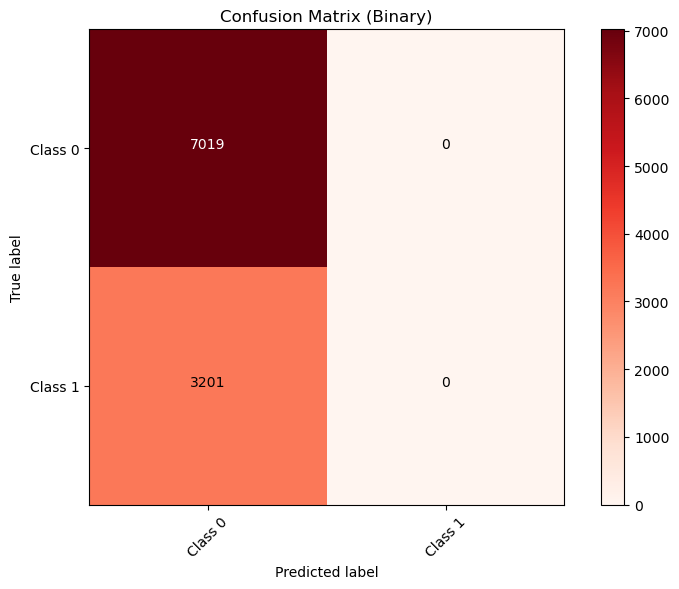

In [54]:

# Assuming y_test and y_pred are already defined

# Combine classes 1 and 2 into a single class, say 1
y_test_binary = np.where(y_test == 0, 0, 1)
y_pred_binary = np.where(y_pred == 0, 0, 1)

# Calculate the confusion matrix for the binary classification
cm_binary = confusion_matrix(y_test_binary, y_pred_binary)

# Visualize the binary confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm_binary, interpolation='nearest', cmap=plt.cm.Reds)
plt.title('Confusion Matrix (Binary)')
plt.colorbar()
classes_binary = ['Class 0', 'Class 1']
tick_marks = np.arange(len(classes_binary))
plt.xticks(tick_marks, classes_binary, rotation=45)
plt.yticks(tick_marks, classes_binary)

fmt = 'd'
thresh = cm_binary.max() / 2.
for i, j in np.ndindex(cm_binary.shape):
    plt.text(j, i, format(cm_binary[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm_binary[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


# Decision Tree

# Initial Modeling

In [55]:
# Initial Model Building
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

y_pred = dt_clf.predict(X_test)

scores = cross_val_score(dt_clf, X, y, cv=5)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

def print_score(scores):
    print(f"Cross-validation scores: {scores}")
    print(f"Accuracy scores: {accuracy}")
    print(f"Precision scores: {precision}")
    print(f"Recall scores: {recall}")
    print(f"F1 scores: {f1}")
    print(f"Classification Report: {cr}")
    print(f"Confusion Matrix: {cm}")

print_score(scores)

Cross-validation scores: [0.5714076  0.57060032 0.56954128 0.56770642 0.56961468]
Accuracy scores: 0.5647749510763209
Precision scores: 0.5680467435431739
Recall scores: 0.5647749510763209
F1 scores: 0.5663719879595057
Classification Report:               precision    recall  f1-score   support

           0       0.69      0.68      0.68      7019
           1       0.31      0.32      0.31      3200
           2       0.00      0.00      0.00         1

    accuracy                           0.56     10220
   macro avg       0.33      0.33      0.33     10220
weighted avg       0.57      0.56      0.57     10220

Confusion Matrix: [[4750 2269    0]
 [2178 1022    0]
 [   1    0    0]]


# Hyperparameter Tuning

In [56]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV


# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV with the classifier and parameter grid
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the final model with the best parameters
final_model = DecisionTreeClassifier(**best_params, random_state=42)
final_model.fit(X_train, y_train)

# Evaluating with the best parameters
y_pred = final_model.predict(X_test)
scores = cross_val_score(dt_clf, X, y, cv=5)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print_score(scores)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Cross-validation scores: [0.5714076  0.57060032 0.56954128 0.56770642 0.56961468]
Accuracy scores: 0.6831702544031311
Precision scores: 0.5864385718240916
Recall scores: 0.6831702544031311
F1 scores: 0.5661404201313673
Classification Report:               precision    recall  f1-score   support

           0       0.69      0.99      0.81      7019
           1       0.36      0.02      0.03      3200
           2       0.00      0.00      0.00         1

    accuracy                           0.68     10220
   macro avg       0.35      0.33      0.28     10220
weighted avg       0.59      0.68      0.57     10220

Confusion Matrix: [[6932   87    0]
 [3150   50    0]
 [   1    0    0]]


# Confusion Matrix

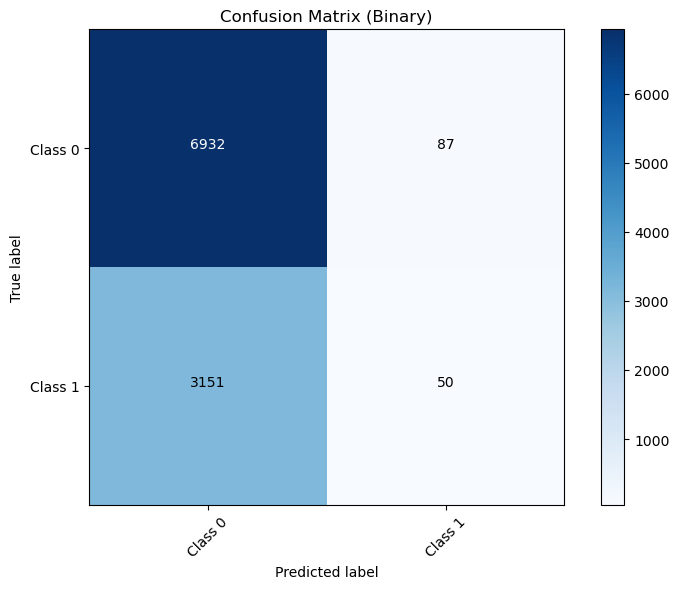

In [57]:

# Assuming y_test and y_pred are already defined

# Combine classes 1 and 2 into a single class, say 1
y_test_binary = np.where(y_test == 0, 0, 1)
y_pred_binary = np.where(y_pred == 0, 0, 1)

# Calculate the confusion matrix for the binary classification
cm_binary = confusion_matrix(y_test_binary, y_pred_binary)

# Visualize the binary confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm_binary, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Binary)')
plt.colorbar()
classes_binary = ['Class 0', 'Class 1']
tick_marks = np.arange(len(classes_binary))
plt.xticks(tick_marks, classes_binary, rotation=45)
plt.yticks(tick_marks, classes_binary)

fmt = 'd'
thresh = cm_binary.max() / 2.
for i, j in np.ndindex(cm_binary.shape):
    plt.text(j, i, format(cm_binary[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm_binary[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# K Nearest Neighbours

# Initial Modeling

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Initialize the k-NN classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k)
knn_clf.fit(X_train, y_train)

# Make predictions
y_pred = knn_clf.predict(X_test)

# Evaluate the model using cross-validation and other metrics
scores = cross_val_score(knn_clf, X, y, cv=5)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Function to print the evaluation metrics
def print_score(scores):
    print(f"Cross-validation scores: {scores}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("Classification Report:")
    print(cr)
    print("Confusion Matrix:")
    print(cm)

print_score(scores)


Cross-validation scores: [0.61911052 0.61874358 0.61614679 0.61423853 0.61915596]
Accuracy: 0.6183953033268101
Precision: 0.5724031527643944
Recall: 0.6183953033268101
F1 Score: 0.5869288463657891
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.81      0.75      7019
           1       0.32      0.19      0.24      3200
           2       0.00      0.00      0.00         1

    accuracy                           0.62     10220
   macro avg       0.34      0.33      0.33     10220
weighted avg       0.57      0.62      0.59     10220

Confusion Matrix:
[[5705 1314    0]
 [2585  615    0]
 [   1    0    0]]


# Hyperparameter Tuning

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Define the hyperparameter grid for k-NN
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Different values of k (number of neighbors)
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metric
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algorithm used to compute the nearest neighbors
}

# Initialize the k-NN classifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV with the classifier and parameter grid
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the final model with the best parameters
final_model = KNeighborsClassifier(**best_params)
final_model.fit(X_train, y_train)

# Evaluating with the best parameters
y_pred = final_model.predict(X_test)
scores = cross_val_score(final_model, X, y, cv=5)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

def print_score(scores):
    print(f"Cross-validation scores: {scores}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("Classification Report:")
    print(cr)
    print("Confusion Matrix:")
    print(cm)

print_score(scores)


Fitting 5 folds for each of 96 candidates, totalling 480 fits
Cross-validation scores: [0.64156759 0.63907236 0.63750459 0.63611009 0.6452844 ]
Accuracy: 0.6386497064579256
Precision: 0.5666421478222248
Recall: 0.6386497064579256
F1 Score: 0.5822888948980152
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.87      0.77      7019
           1       0.31      0.12      0.17      3200
           2       0.00      0.00      0.00         1

    accuracy                           0.64     10220
   macro avg       0.33      0.33      0.31     10220
weighted avg       0.57      0.64      0.58     10220

Confusion Matrix:
[[6140  879    0]
 [2813  387    0]
 [   0    1    0]]


# Confusion Matrix

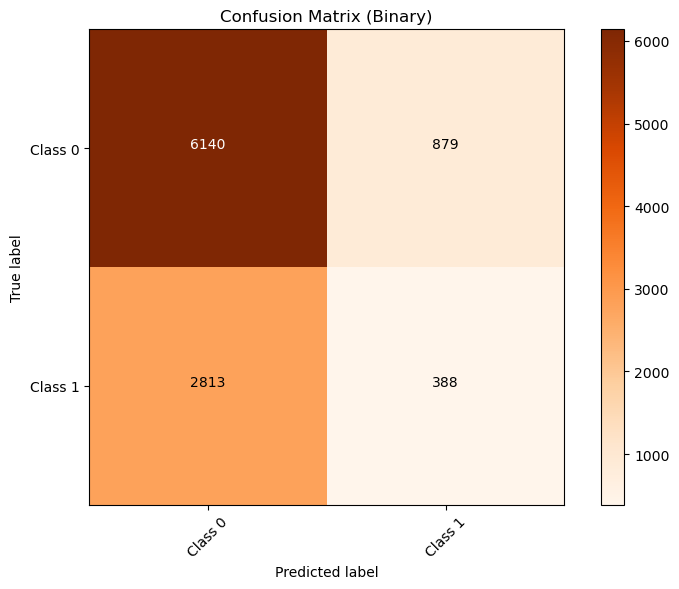

In [60]:

# Assuming y_test and y_pred are already defined

# Combine classes 1 and 2 into a single class, say 1
y_test_binary = np.where(y_test == 0, 0, 1)
y_pred_binary = np.where(y_pred == 0, 0, 1)

# Calculate the confusion matrix for the binary classification
cm_binary = confusion_matrix(y_test_binary, y_pred_binary)

# Visualize the binary confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm_binary, interpolation='nearest', cmap=plt.cm.Oranges)
plt.title('Confusion Matrix (Binary)')
plt.colorbar()
classes_binary = ['Class 0', 'Class 1']
tick_marks = np.arange(len(classes_binary))
plt.xticks(tick_marks, classes_binary, rotation=45)
plt.yticks(tick_marks, classes_binary)

fmt = 'd'
thresh = cm_binary.max() / 2.
for i, j in np.ndindex(cm_binary.shape):
    plt.text(j, i, format(cm_binary[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm_binary[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# Navies Bayies

# Initial Modeling

In [61]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Initialize the Naive Bayes classifier
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

# Make predictions
y_pred = nb_clf.predict(X_test)

# Evaluate the model using cross-validation and other metrics
scores = cross_val_score(nb_clf, X, y, cv=5)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Function to print the evaluation metrics
def print_score(scores):
    print(f"Cross-validation scores: {scores}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("Classification Report:")
    print(cr)
    print("Confusion Matrix:")
    print(cm)

print_score(scores)


Cross-validation scores: [0.68266549 0.6825921  0.68256881 0.6827156  0.6827156 ]
Accuracy: 0.6867906066536204
Precision: 0.47168133738764784
Recall: 0.6867906066536204
F1 Score: 0.5592648376473996
Classification Report:
              precision    recall  f1-score   support

           0       0.69      1.00      0.81      7019
           1       0.00      0.00      0.00      3200
           2       0.00      0.00      0.00         1

    accuracy                           0.69     10220
   macro avg       0.23      0.33      0.27     10220
weighted avg       0.47      0.69      0.56     10220

Confusion Matrix:
[[7019    0    0]
 [3200    0    0]
 [   1    0    0]]


# Hyperparameter Tuning

In [62]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Define the hyperparameter grid for Gaussian Naive Bayes
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Smoothing parameter to deal with numerical stability
}

# Initialize the Naive Bayes classifier
nb = GaussianNB()

# Initialize GridSearchCV with the classifier and parameter grid
grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the final model with the best parameters
final_model = GaussianNB(**best_params)
final_model.fit(X_train, y_train)

# Evaluating with the best parameters
y_pred = final_model.predict(X_test)
scores = cross_val_score(final_model, X, y, cv=5)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Function to print the evaluation metrics
def print_score(scores):
    print(f"Cross-validation scores: {scores}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("Classification Report:")
    print(cr)
    print("Confusion Matrix:")
    print(cm)

print_score(scores)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Cross-validation scores: [0.68266549 0.6825921  0.68256881 0.6827156  0.6827156 ]
Accuracy: 0.6867906066536204
Precision: 0.47168133738764784
Recall: 0.6867906066536204
F1 Score: 0.5592648376473996
Classification Report:
              precision    recall  f1-score   support

           0       0.69      1.00      0.81      7019
           1       0.00      0.00      0.00      3200
           2       0.00      0.00      0.00         1

    accuracy                           0.69     10220
   macro avg       0.23      0.33      0.27     10220
weighted avg       0.47      0.69      0.56     10220

Confusion Matrix:
[[7019    0    0]
 [3200    0    0]
 [   1    0    0]]


# Confusion Matrix

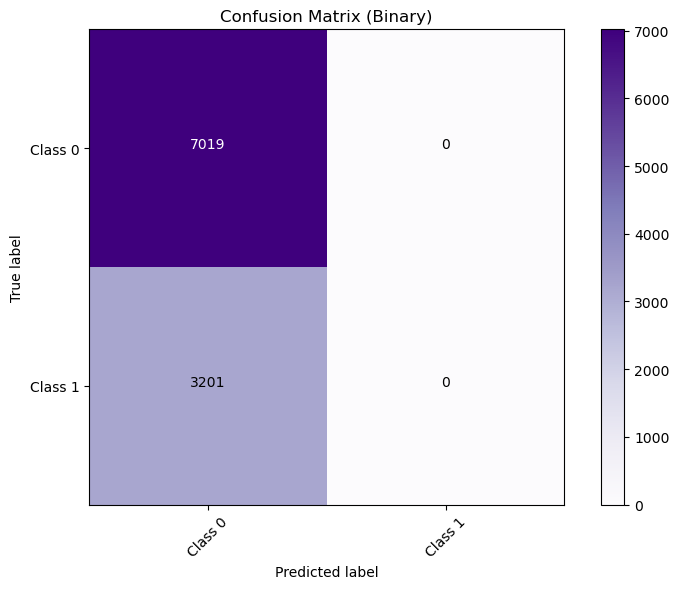

In [63]:

# Assuming y_test and y_pred are already defined

# Combine classes 1 and 2 into a single class, say 1
y_test_binary = np.where(y_test == 0, 0, 1)
y_pred_binary = np.where(y_pred == 0, 0, 1)

# Calculate the confusion matrix for the binary classification
cm_binary = confusion_matrix(y_test_binary, y_pred_binary)

# Visualize the binary confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm_binary, interpolation='nearest', cmap=plt.cm.Purples)
plt.title('Confusion Matrix (Binary)')
plt.colorbar()
classes_binary = ['Class 0', 'Class 1']
tick_marks = np.arange(len(classes_binary))
plt.xticks(tick_marks, classes_binary, rotation=45)
plt.yticks(tick_marks, classes_binary)

fmt = 'd'
thresh = cm_binary.max() / 2.
for i, j in np.ndindex(cm_binary.shape):
    plt.text(j, i, format(cm_binary[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm_binary[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# ROC Curve

In [91]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [92]:
# Predict probabilities
y_probs_lr = lr_clf.predict_proba(X_test)[:, 1]
y_probs_rf = rf_clf.predict_proba(X_test)[:, 1]
y_probs_dt = dt_clf.predict_proba(X_test)[:, 1]
y_probs_knn = knn_clf.predict_proba(X_test)[:, 1]
y_probs_nb = nb_clf.predict_proba(X_test)[:, 1]

In [135]:
classes = np.unique(y_test)

y_test_bin = (y_test == class_val).astype(int)

fpr_lr, tpr_lr, _ = roc_curve(y_test_bin, y_probs_lr)
roc_auc_lr = roc_auc_score(y_test_bin, y_probs_lr)

fpr_rf, tpr_rf, _ = roc_curve(y_test_bin, y_probs_rf)
roc_auc_rf = roc_auc_score(y_test_bin, y_probs_rf)

fpr_dt, tpr_dt, _ = roc_curve(y_test_bin, y_probs_dt)
roc_auc_dt = roc_auc_score(y_test_bin, y_probs_dt)

fpr_knn, tpr_knn, _ = roc_curve(y_test_bin, y_probs_knn)
roc_auc_knn = roc_auc_score(y_test_bin, y_probs_knn)

fpr_nb, tpr_nb, _ = roc_curve(y_test_bin, y_probs_nb)
roc_auc_nb = roc_auc_score(y_test_bin, y_probs_nb)


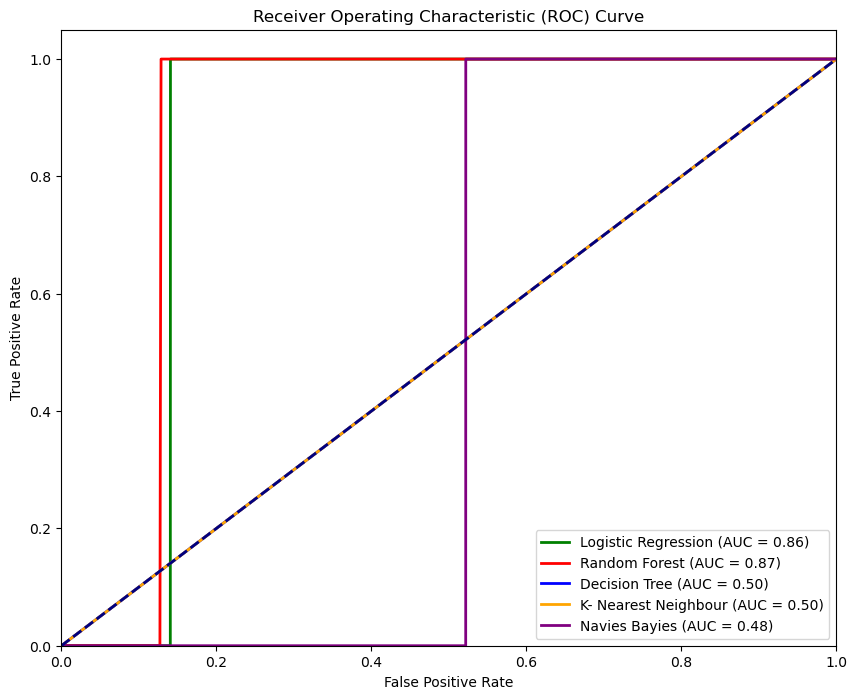

In [133]:
# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, color='green', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_knn, tpr_knn, color='orange', lw=2, label=f'K- Nearest Neighbour (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_nb, tpr_nb, color='purple', lw=2, label=f'Navies Bayies (AUC = {roc_auc_nb:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve

In [136]:
from sklearn.metrics import precision_recall_curve, auc

In [137]:
# Predict probabilities
y_probs_lr = lr_clf.predict_proba(X_test)[:, 1]
y_probs_rf = rf_clf.predict_proba(X_test)[:, 1]
y_probs_dt = dt_clf.predict_proba(X_test)[:, 1]
y_probs_knn = knn_clf.predict_proba(X_test)[:, 1]
y_probs_nb = nb_clf.predict_proba(X_test)[:, 1]

In [139]:
classes = np.unique(y_test)

y_test_bin = (y_test == class_val).astype(int)

precision_lr, recall_lr, _ = precision_recall_curve(y_test_bin, y_probs_lr)
pr_auc_lr = auc(recall_lr, precision_lr)

precision_rf, recall_rf, _ = precision_recall_curve(y_test_bin, y_probs_rf)
pr_auc_rf = auc(recall_rf, precision_rf)

precision_dt, recall_dt, _ = precision_recall_curve(y_test_bin, y_probs_dt)
pr_auc_dt = auc(recall_dt, precision_dt)

precision_knn, recall_knn, _ = precision_recall_curve(y_test_bin, y_probs_knn)
pr_auc_knn = auc(recall_knn, precision_knn)

precision_nb, recall_nb, _ = precision_recall_curve(y_test_bin, y_probs_nb)
pr_auc_nb = auc(recall_nb, precision_nb)

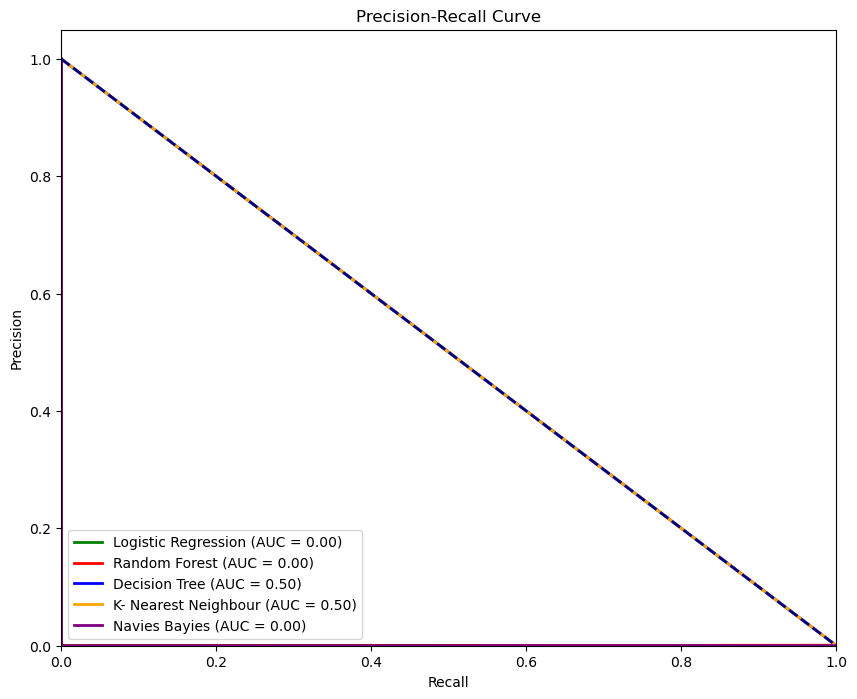

In [140]:
# Plot Precision-Recall curve
plt.figure(figsize=(10, 8))
plt.plot(recall_lr, precision_lr, color='green', lw=2, label=f'Logistic Regression (AUC = {pr_auc_lr:.2f})')
plt.plot(recall_rf, precision_rf, color='red', lw=2, label=f'Random Forest (AUC = {pr_auc_rf:.2f})')
plt.plot(recall_dt, precision_dt, color='blue', lw=2, label=f'Decision Tree (AUC = {pr_auc_dt:.2f})')
plt.plot(recall_knn, precision_knn, color='orange', lw=2, label=f'K- Nearest Neighbour (AUC = {pr_auc_knn:.2f})')
plt.plot(recall_nb, precision_nb, color='purple', lw=2, label=f'Navies Bayies (AUC = {pr_auc_nb:.2f})')

plt.plot([0, 1], [1, 0], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Validation Curve

In [141]:
from sklearn.model_selection import validation_curve

In [142]:
# Define parameter ranges for validation curves
param_range_lr = np.logspace(-6, -1, 6)
param_range_rf = np.arange(1, 21)
param_range_dt = np.arange(1, 21)
param_range_knn = np.arange(1, 21)  
param_range_nb = np.arange(0.1, 1.1, 0.1)

In [144]:
# Compute validation curve for Logistic Regression
train_scores_lr, test_scores_lr = validation_curve(
    lr_clf, X_train, y_train, param_name="C", param_range=param_range_lr, cv=5, scoring="accuracy", n_jobs=-1)

# Compute validation curve for Random Forest
train_scores_rf, test_scores_rf = validation_curve(
    rf_clf, X_train, y_train, param_name="n_estimators", param_range=param_range_rf, cv=5, scoring="accuracy", n_jobs=-1)

# Compute validation curve for Decision Tree
train_scores_dt, test_scores_dt = validation_curve(
    dt_clf, X_train, y_train, param_name="max_depth", param_range=param_range_dt, cv=5, scoring="accuracy", n_jobs=-1)

# Compute validation curve for KNN
train_scores_knn, test_scores_knn = validation_curve(
    knn_clf, X_train, y_train, param_name="n_neighbors", param_range=param_range_knn, cv=5, scoring="accuracy", n_jobs=-1)

# Compute validation curve for Naive Bayes
train_scores_nb, test_scores_nb = validation_curve(
    nb_clf, X_train, y_train, param_name="var_smoothing", param_range=param_range_nb, cv=5, scoring="accuracy", n_jobs=-1)

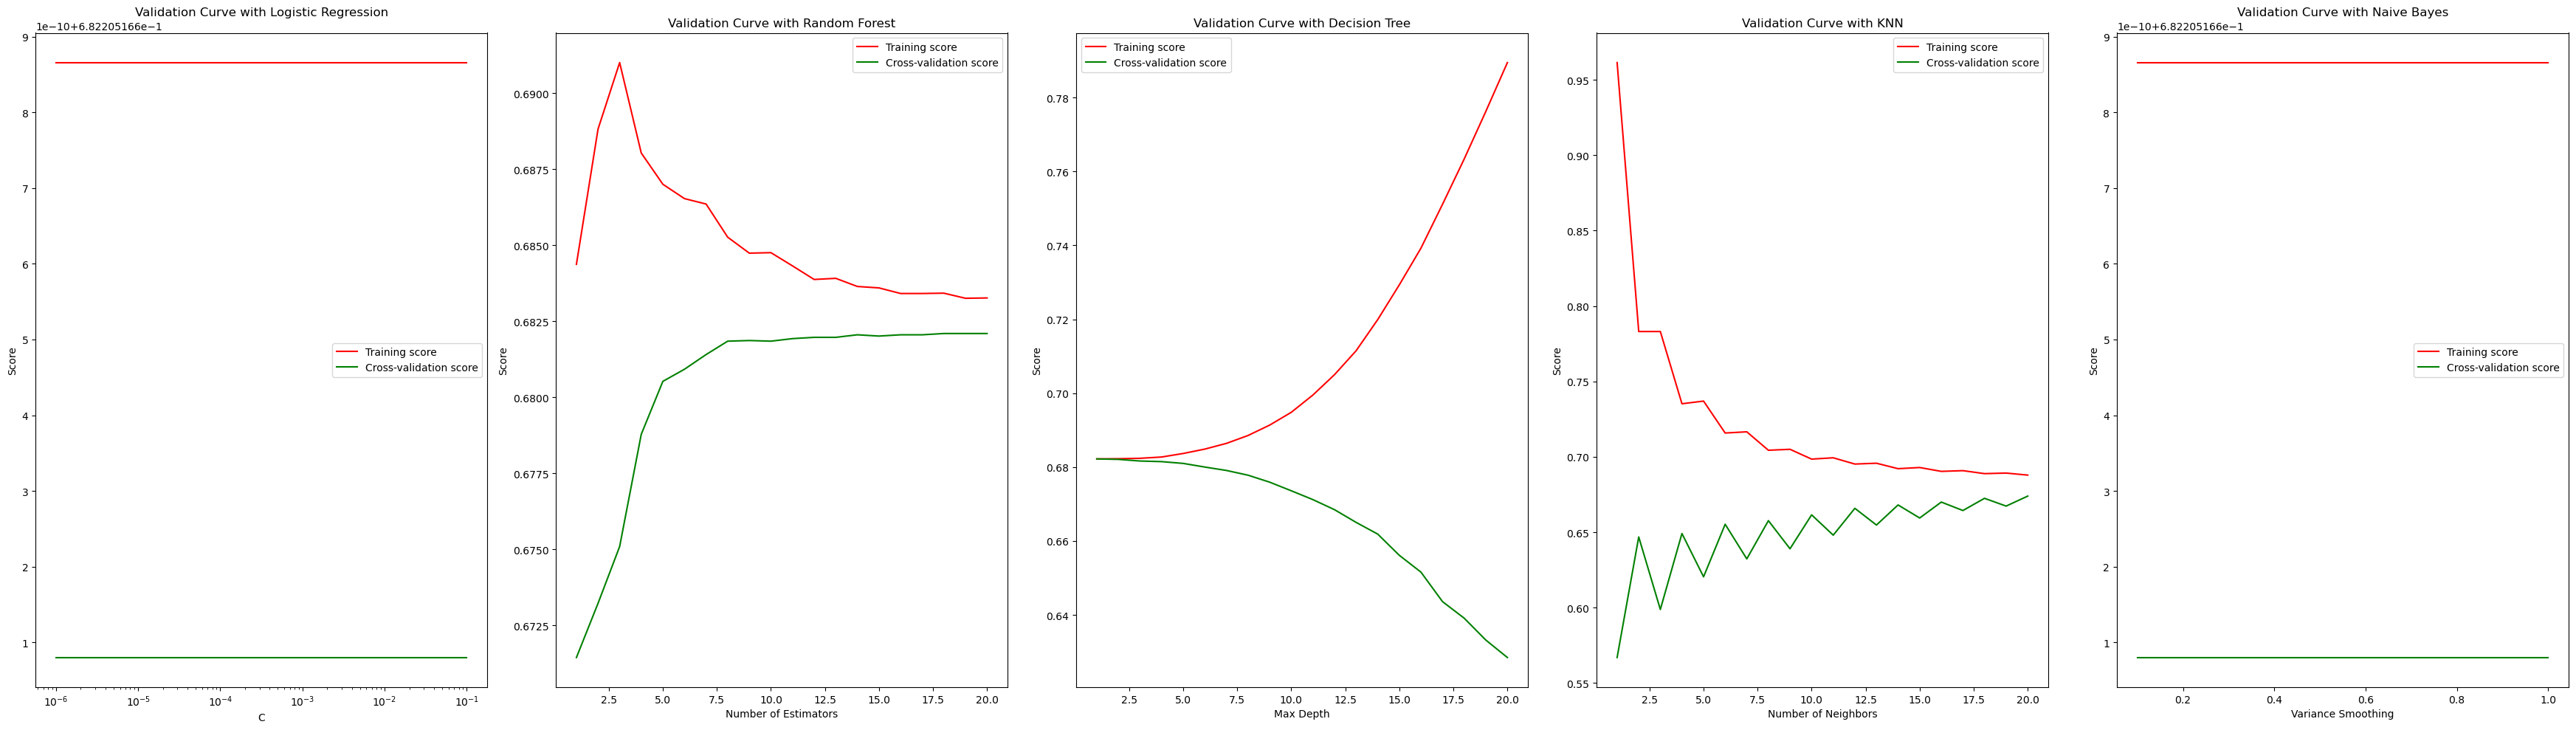

In [152]:
# Plot validation curves
fig, axes = plt.subplots(1, 5, figsize=(35, 10))

# Logistic Regression
axes[0].plot(param_range_lr, np.mean(train_scores_lr, axis=1), label="Training score", color="r")
axes[0].plot(param_range_lr, np.mean(test_scores_lr, axis=1), label="Cross-validation score", color="g")
axes[0].set_title("Validation Curve with Logistic Regression")
axes[0].set_xlabel("C")
axes[0].set_ylabel("Score")
axes[0].set_xscale("log")
axes[0].legend(loc="best")

# Random Forest
axes[1].plot(param_range_rf, np.mean(train_scores_rf, axis=1), label="Training score", color="r")
axes[1].plot(param_range_rf, np.mean(test_scores_rf, axis=1), label="Cross-validation score", color="g")
axes[1].set_title("Validation Curve with Random Forest")
axes[1].set_xlabel("Number of Estimators")
axes[1].set_ylabel("Score")
axes[1].legend(loc="best")

# Decision Tree
axes[2].plot(param_range_dt, np.mean(train_scores_dt, axis=1), label="Training score", color="r")
axes[2].plot(param_range_dt, np.mean(test_scores_dt, axis=1), label="Cross-validation score", color="g")
axes[2].set_title("Validation Curve with Decision Tree")
axes[2].set_xlabel("Max Depth")
axes[2].set_ylabel("Score")
axes[2].legend(loc="best")

# KNN
axes[3].plot(param_range_knn, np.mean(train_scores_knn, axis=1), label="Training score", color="r")
axes[3].plot(param_range_knn, np.mean(test_scores_knn, axis=1), label="Cross-validation score", color="g")
axes[3].set_title("Validation Curve with KNN")
axes[3].set_xlabel("Number of Neighbors")
axes[3].set_ylabel("Score")
axes[3].legend(loc="best")

# Naive Bayes
axes[4].plot(param_range_nb, np.mean(train_scores_nb, axis=1), label="Training score", color="r")
axes[4].plot(param_range_nb, np.mean(test_scores_nb, axis=1), label="Cross-validation score", color="g")
axes[4].set_title("Validation Curve with Naive Bayes")
axes[4].set_xlabel("Variance Smoothing")
axes[4].set_ylabel("Score")
axes[4].legend(loc="best")

plt.tight_layout()
plt.show()